<h3>Project Name:<i><b> "A research on Students Academic Success Using ML" </b></i><br></h3>
<p>Dataset Source: <a href="https://www.kaggle.com/competitions/playground-series-s4e6/data" target="_blank">Academic Success Dataset</a></p>

---
---

<b> CSE-427 Research Project | Group-9 | Section-1 |</b>

<b>Name: Faishal Monir<br>
ID: 22101235</b>

<b>Name: Umma Salma Mim<br>
ID: 22101870
</b>


---
---

###**Data Preprocessing !!**

In [ ]:
pip install tensorflow

In [ ]:
pip install xlsxwriter

In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import VotingClassifier

In [ ]:
def printer():
    print(f'\n===============================================================================================================================\n')

In [ ]:
#Training
file_link = 'https://drive.google.com/file/d/13M8afokVNgkuzV106YVNLNKiZnSp2JxB/view?usp=drive_link' # the file access must have to be Public
id = file_link.split("/")[-2]
print(id)

new_link = f'https://drive.google.com/uc?id={id}'
print(new_link)
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head(5)

13M8afokVNgkuzV106YVNLNKiZnSp2JxB
https://drive.google.com/uc?id=13M8afokVNgkuzV106YVNLNKiZnSp2JxB


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
#Testing

file_link = 'https://drive.google.com/file/d/186nyKFqSa0OiqzWo-JuGDdskBVH4ueYM/view?usp=drive_link'
id_test = file_link.split("/")[-2]
# print(id)

new_link_test = f'https://drive.google.com/uc?id={id_test}'
print(new_link)
df_test = pd.read_csv(new_link_test)

df_test.head(5)

https://drive.google.com/uc?id=13M8afokVNgkuzV106YVNLNKiZnSp2JxB


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [ ]:
df.shape #train


(76518, 38)

In [ ]:
df_test.shape #testing

(51012, 37)

In [ ]:
df.info()
printer()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
df.describe(include='all')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36282
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921,NaN
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382,NaN
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000,NaN
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000,NaN


In [ ]:
df_test.describe(include='all')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.00000,51012.000000,...,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,102023.500000,1.109092,16.067102,1.648161,9026.304556,0.918313,3.635007,132.328001,1.20009,19.913275,...,0.057810,0.129283,5.944131,7.274092,4.039697,9.709128,0.063809,11.520611,1.228719,-0.086477
std,14726.040303,0.438084,16.654196,1.235666,1751.328311,0.273889,8.577250,10.885679,3.26473,15.383823,...,0.403434,0.877250,1.599746,3.433149,2.749871,5.496810,0.467176,2.651113,1.402773,2.251650
min,76518.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,89270.750000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.00000,1.000000,...,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,102023.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.00000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,11.100000,1.400000,0.320000
75%,114776.250000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,139.000000,1.00000,37.000000,...,0.000000,0.000000,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000
max,127529.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.00000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,17.714286,10.000000,16.200000,3.700000,3.510000


In [ ]:
df.nunique()

,0
id,76518
Marital status,6
Application mode,22
Application order,8
Course,19
Daytime/evening attendance,2
Previous qualification,21
Previous qualification (grade),110
Nacionality,18
Mother's qualification,35


In [ ]:
df_test.nunique()

,0
id,51012
Marital status,6
Application mode,20
Application order,8
Course,21
Daytime/evening attendance,2
Previous qualification,20
Previous qualification (grade),108
Nacionality,18
Mother's qualification,32


In [ ]:
df.isnull().sum()

,0
id,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0


In [ ]:
df_test.isnull().sum()

,0
id,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0


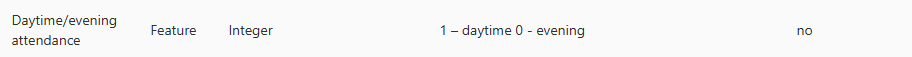

In [ ]:
df['Target'] = df['Target'].map({'Graduate':1, 'Dropout':0, 'Enrolled':2})
df['Target'].head(5)

,Target
0,1
1,0
2,0
3,2
4,1


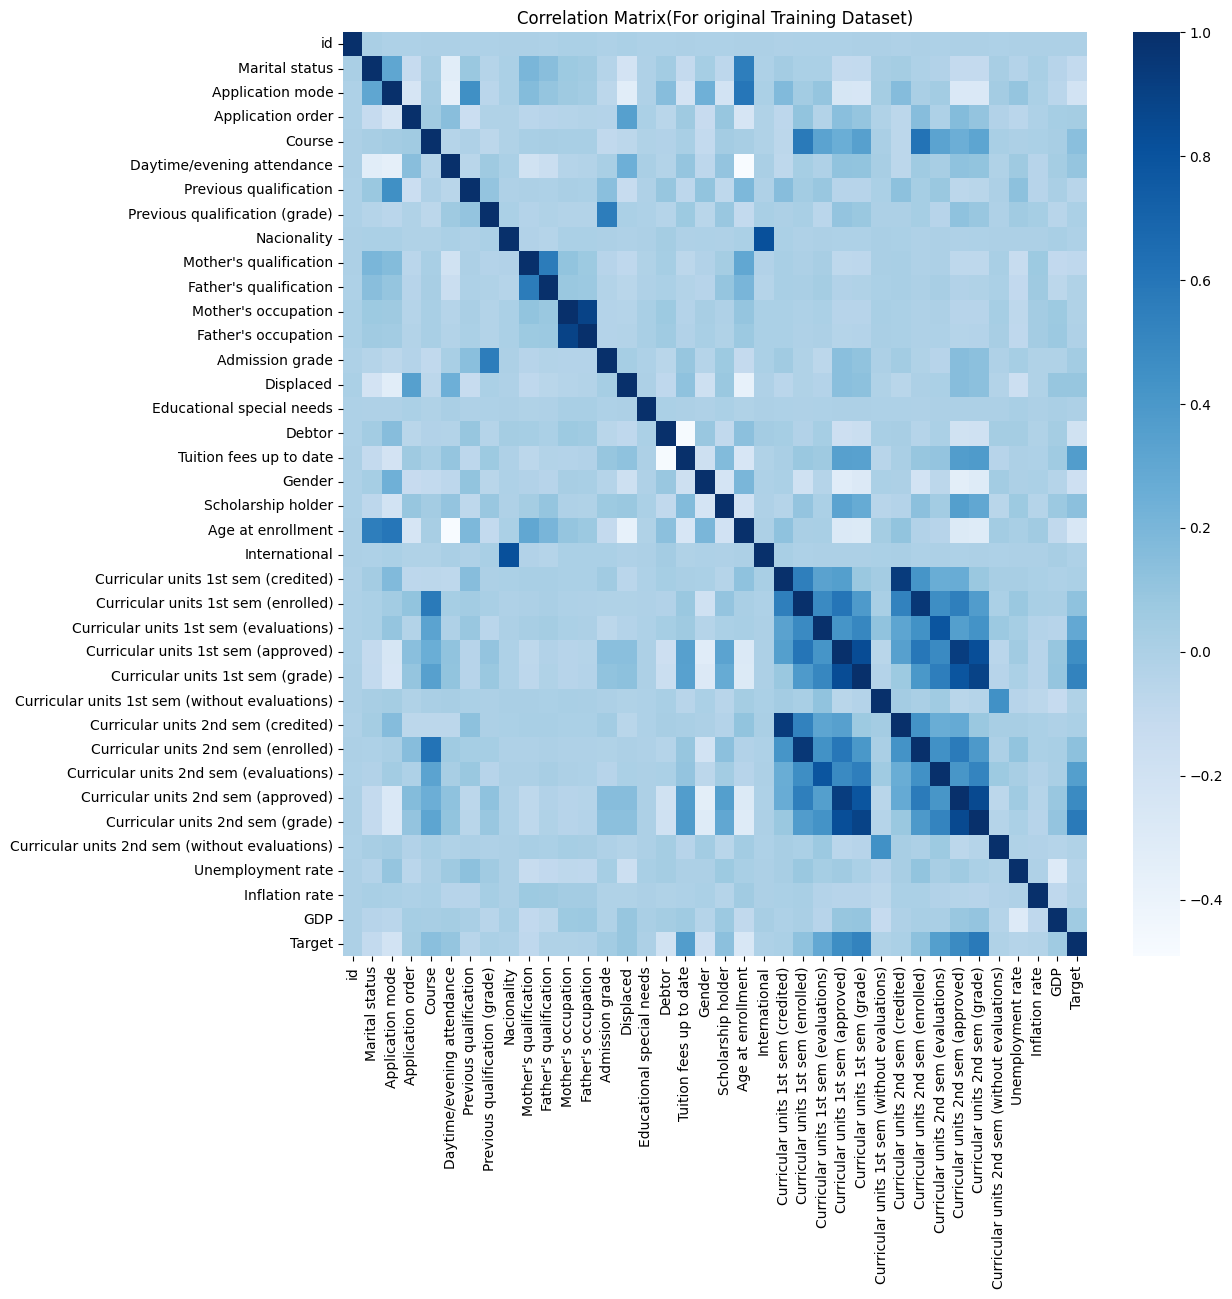

In [ ]:
corelation=df.corr()
corelation
plt.figure(figsize=(12,12))
sns.heatmap(corelation, cmap='Blues')
plt.title('Correlation Matrix(For original Training Dataset)')
plt.show()

In [ ]:
df= df.drop(['id','Application order','Educational special needs','Nacionality','International','Mother\'s occupation','Father\'s occupation'], axis = 1)
df.shape

(76518, 31)

In [ ]:
df_test= df_test.drop(['id','Application order','Educational special needs','Nacionality','International','Mother\'s occupation','Father\'s occupation'], axis = 1)
df_test.shape

(51012, 30)

In [ ]:
df.info()
df.shape
printer()
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Course                                          76518 non-null  int64  
 3   Daytime/evening attendance                      76518 non-null  int64  
 4   Previous qualification                          76518 non-null  int64  
 5   Previous qualification (grade)                  76518 non-null  float64
 6   Mother's qualification                          76518 non-null  int64  
 7   Father's qualification                          76518 non-null  int64  
 8   Admission grade                                 76518 non-null  float64
 9   Displaced                              

(51012, 30)

In [ ]:
print("Total Unique values in each column:\n", df.nunique())
printer()


Total Unique values in each column:
 Marital status                                       6
Application mode                                    22
Course                                              19
Daytime/evening attendance                           2
Previous qualification                              21
Previous qualification (grade)                     110
Mother's qualification                              35
Father's qualification                              39
Admission grade                                    668
Displaced                                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarship holder                                   2
Age at enrollment                                   46
Curricular units 1st sem (credited)                 21
Curricular units 1st sem (enrolled)                 24
Curricular units 1st sem (ev

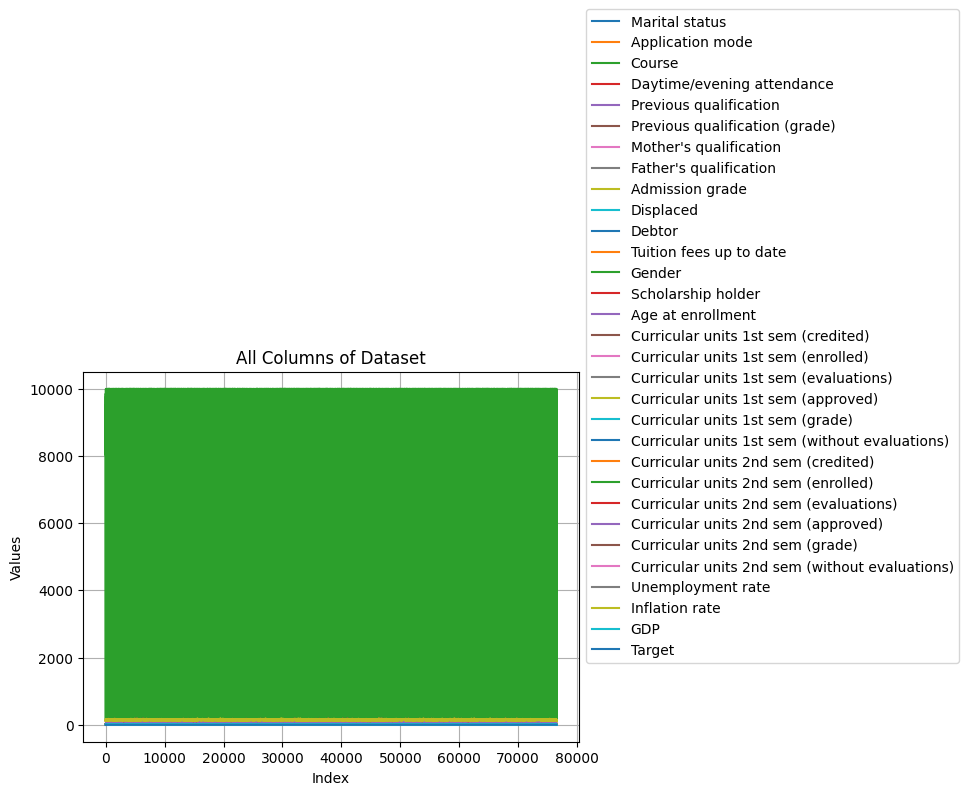

In [ ]:
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.title('All Columns of Dataset')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend(loc='upper left', bbox_to_anchor=(1, 2))


plt.grid(True)
plt.show()

In [ ]:
x_train_src= df.iloc[:, :-1]
target= df.iloc[:, -1]    #target colum
print("X shape: ",x_train_src.shape)
print("Y shape: ",target.shape)
x_train_src.head()

X shape:  (76518, 30)
Y shape:  (76518,)


,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,9238,1,1,126.0,1,19,122.6,0,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,9238,1,1,125.0,19,19,119.8,1,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,9254,1,1,137.0,3,19,144.7,0,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,9500,1,1,131.0,19,3,126.1,1,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,9500,1,1,132.0,19,37,120.1,1,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [ ]:
target.head(10)

,Target
0,1
1,0
2,0
3,2
4,1
5,0
6,1
7,1
8,0
9,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_src,target, test_size = 0.20, random_state=100)
# scaler = RobustScaler()
# scaler=MinMaxScaler()
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

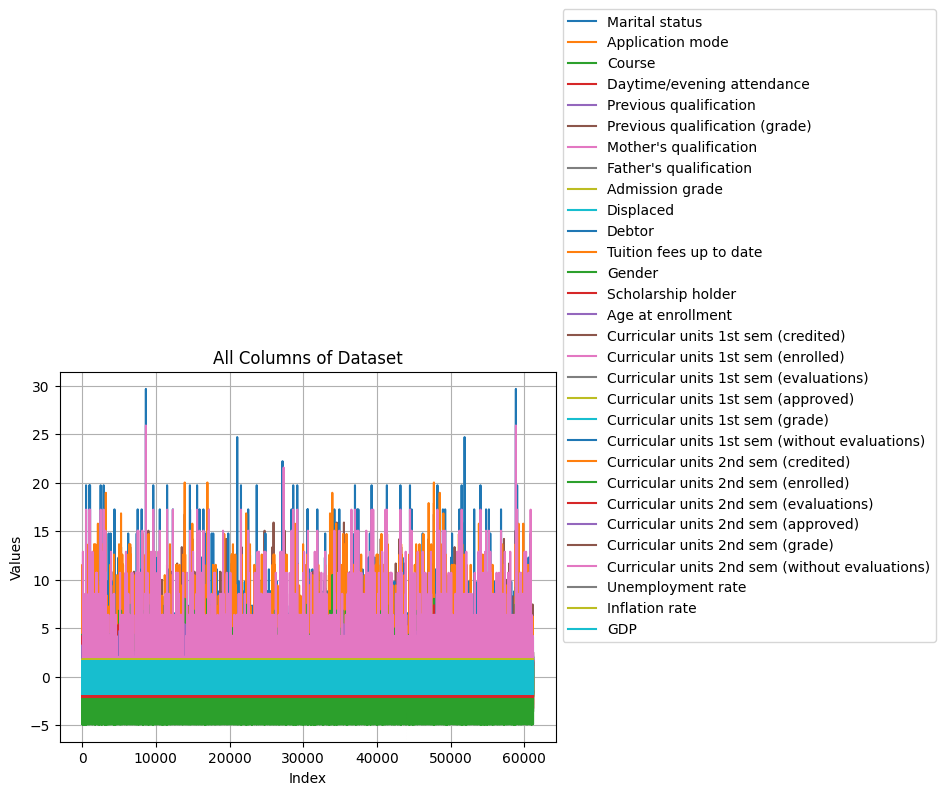

In [ ]:
value = pd.DataFrame(X_train, columns=x_train_src.columns)
for column in value.columns:
    plt.plot(value.index, value[column], label=column)
plt.title('All Columns of Dataset')
plt.xlabel('Index')
plt.ylabel('Values')

plt.legend(loc='upper left', bbox_to_anchor=(1, 2))


plt.grid(True)
plt.show()

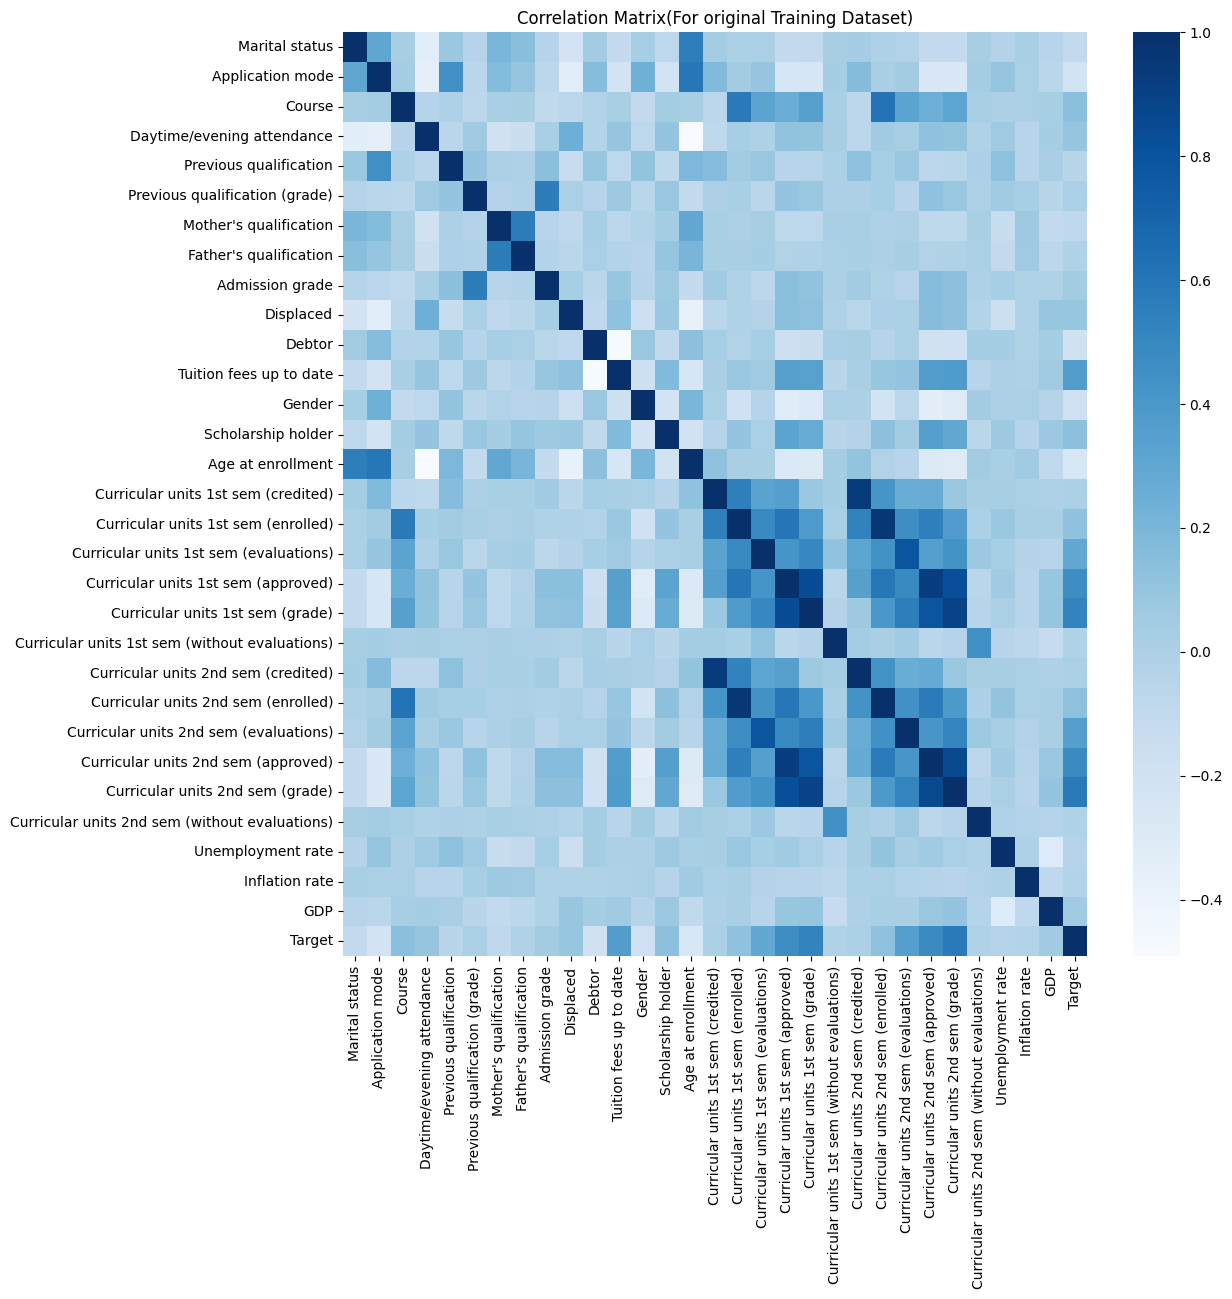

In [ ]:
corelation=df.corr()
corelation
plt.figure(figsize=(12,12))
sns.heatmap(corelation, cmap='Blues')
plt.title('Correlation Matrix(For original Training Dataset)')
plt.show()

In [ ]:
co_relation = df.corr()
target_relation = co_relation["Target"].drop("Target")
sorted_relations = target_relation.sort_values(ascending=False)
print("Coorelation descending:\n")
print(sorted_relations)

Coorelation descending:

Curricular units 2nd sem (grade)                  0.579027
Curricular units 1st sem (grade)                  0.527749
Curricular units 2nd sem (approved)               0.476784
Curricular units 1st sem (approved)               0.463164
Tuition fees up to date                           0.367774
Curricular units 2nd sem (evaluations)            0.358000
Curricular units 1st sem (evaluations)            0.292635
Course                                            0.139493
Scholarship holder                                0.136215
Curricular units 2nd sem (enrolled)               0.129250
Curricular units 1st sem (enrolled)               0.124453
Daytime/evening attendance                        0.102392
Displaced                                         0.095221
GDP                                               0.059995
Admission grade                                   0.049561
Curricular units 1st sem (credited)               0.008397
Curricular units 2nd sem (credi

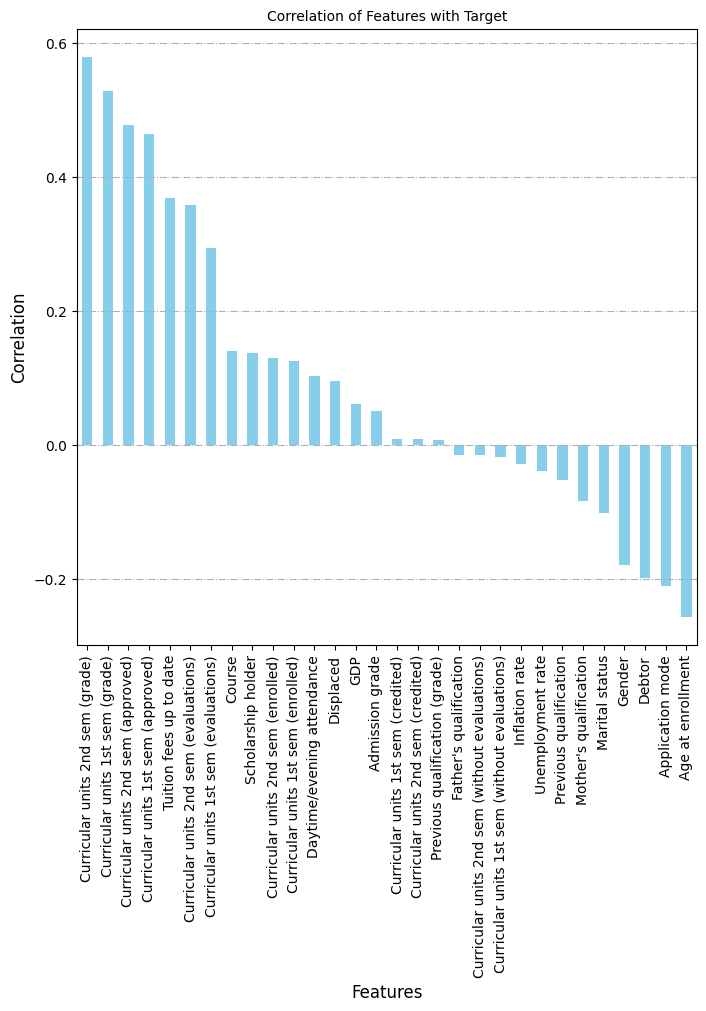

In [ ]:
plt.figure(figsize=(8, 8))
sorted_relations.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target", fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.grid(axis='y', linestyle='dashdot')
plt.show()

##**Model Implementation**


1.   **Decision Tree**
2.   **Random Forest**
3.   **Logistic Regression**
4.   **Ada Boost**
5.   **KNN**
6.   **Neural Network**
7.   **Ensembled Model**



---



---




###**[1] Decision-Tree**




In [ ]:
models=[]
results=[]
features={}

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_train_src,target, test_size = 0.20, random_state=100)

Decision Tree Classifier Accuracy: 0.8118792472556194


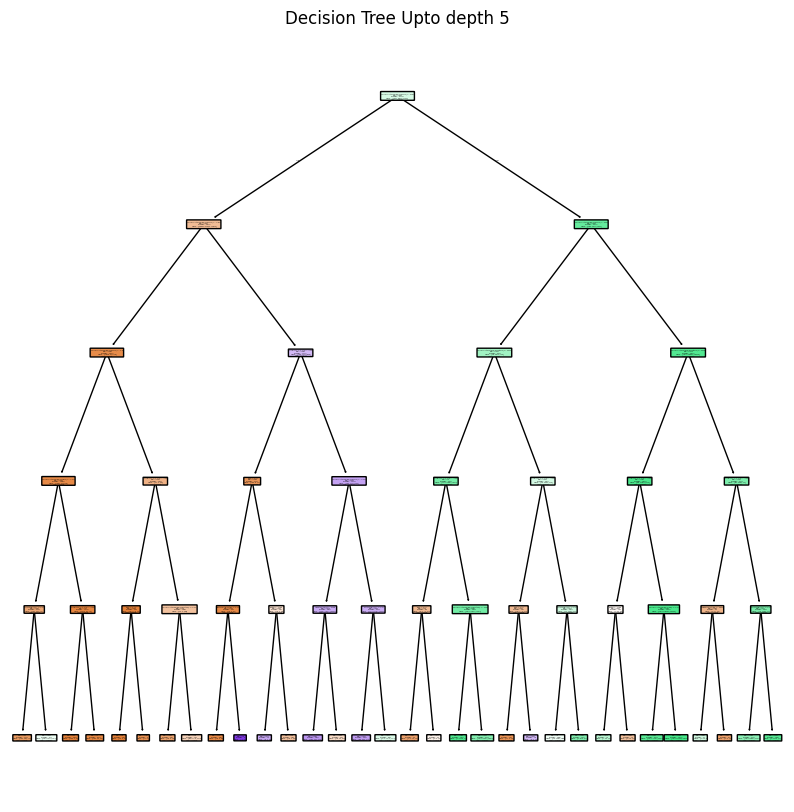

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=1,min_samples_split=2, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
#accuracy = no.of correctly predicted data / total test data

# Visualize the Decision Tree
plt.figure(figsize=(10, 10))
plot_tree(decision_tree_model, feature_names=x_train_src.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
plt.title('Decision Tree Upto depth 5')
plt.show()

models.append("Decision-Tree")
results.append(accuracy_score(y_test, y_pred_dt))
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')

feature_importances = decision_tree_model.feature_importances_
top_features_indices = feature_importances.argsort()[-3:][::-1]
top_features = [x_train_src.columns[i] for i in top_features_indices]
features["Decision-Tree"] = top_features
# print("Top 3 features influencing the Decision Tree:", top_features)

Classification Report Decision Tree:
               precision    recall  f1-score   support

     Dropout       0.90      0.81      0.85      4905
    Graduate       0.81      0.95      0.87      7366
    Enrolled       0.65      0.48      0.55      3033

    accuracy                           0.81     15304
   macro avg       0.79      0.75      0.76     15304
weighted avg       0.81      0.81      0.80     15304



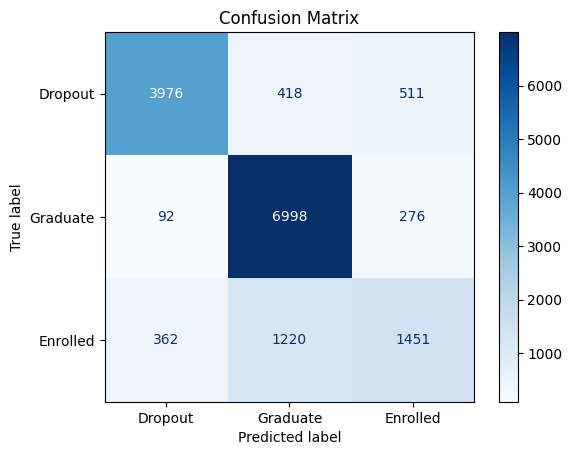

In [ ]:

report = classification_report(y_test, y_pred_dt, target_names=['Dropout', 'Graduate', 'Enrolled'])
print("Classification Report Decision Tree:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dropout', 'Graduate', 'Enrolled'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

###**[2] Random Forest**


Random Forest Classifier Accuracy: 0.8302404600104548


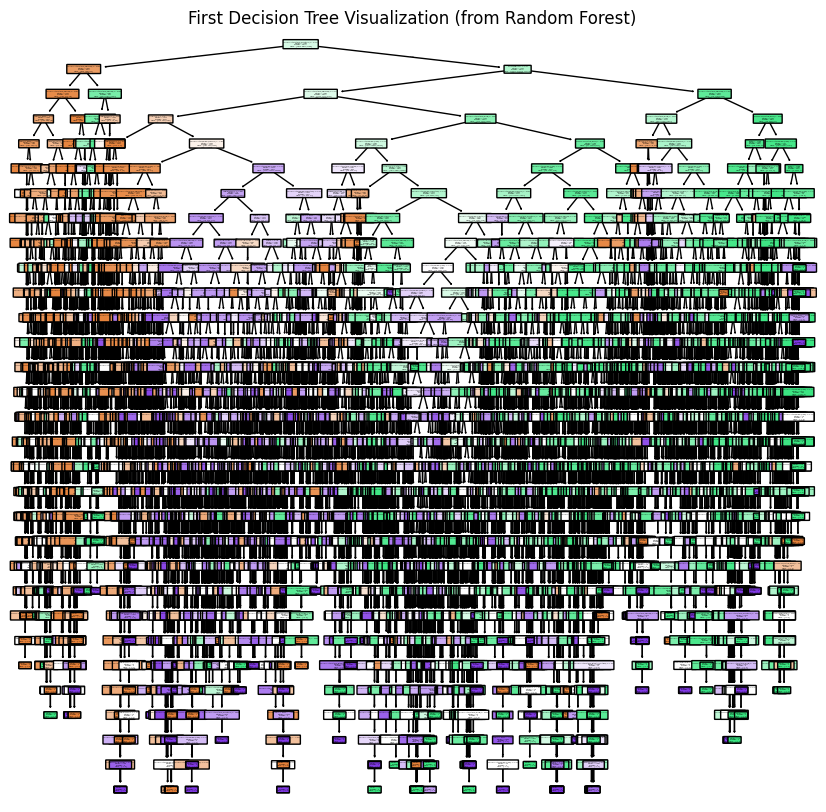

In [ ]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=1000, max_depth = 30, criterion='entropy', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(10, 10))
plot_tree(random_forest_model.estimators_[0], feature_names=x_train_src.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

models.append("Random Forest")
results.append(accuracy_score(y_test, y_pred_rf))
joblib.dump(random_forest_model, 'random_forest_model.pkl')

feature_importances_rf = random_forest_model.feature_importances_
top_features_indices_rf = feature_importances_rf.argsort()[-3:][::-1]
top_features_rf = [x_train_src.columns[i] for i in top_features_indices_rf]
features["Random-Forest"] = top_features_rf

Classification Report Random Forest:
               precision    recall  f1-score   support

     Dropout       0.90      0.82      0.86      4905
    Graduate       0.85      0.93      0.89      7366
    Enrolled       0.66      0.60      0.63      3033

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.79     15304
weighted avg       0.83      0.83      0.83     15304



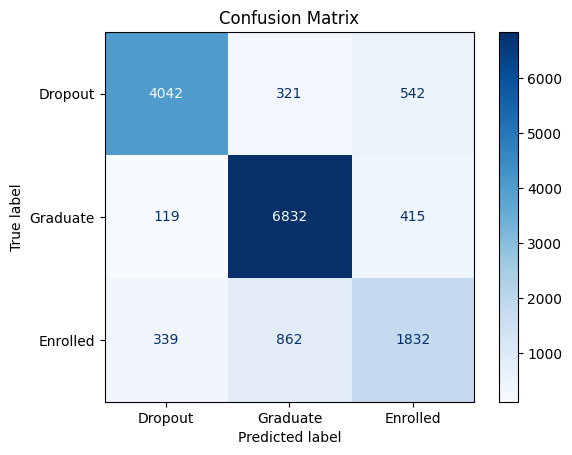

In [ ]:

report = classification_report(y_test, y_pred_rf, target_names=['Dropout', 'Graduate', 'Enrolled'])
print("Classification Report Random Forest:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dropout', 'Graduate', 'Enrolled'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

###**[3] Logistic Regression**

In [ ]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=10000, random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_preds = log_reg_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_preds) * 100:.4f}%")
# Metrics
accuracy_log_reg = accuracy_score(y_test, log_reg_preds)*100
log_reg_report = classification_report(y_test, log_reg_preds)
print(f"\nLogistic Regression Classification Report:\n{log_reg_report}")


models.append("Logistic Regression")
results.append(accuracy_score(y_test, log_reg_preds))
joblib.dump(log_reg_model, 'logistic_regression_model.pkl')


feature_importances_log_reg = abs(log_reg_model.coef_).mean(axis=0)
log_reg_top_features_indices = feature_importances_log_reg.argsort()[-3:][::-1]
top_features_log_reg = [x_train_src.columns[i] for i in log_reg_top_features_indices]
features["Logistic Regression"] = top_features_log_reg

Logistic Regression Accuracy: 81.8544%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      4905
           1       0.84      0.92      0.88      7366
           2       0.63      0.57      0.60      3033

    accuracy                           0.82     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.82      0.82      0.82     15304



Confusion Matrix:
 [[4000  299  606]
 [ 155 6812  399]
 [ 339  979 1715]]


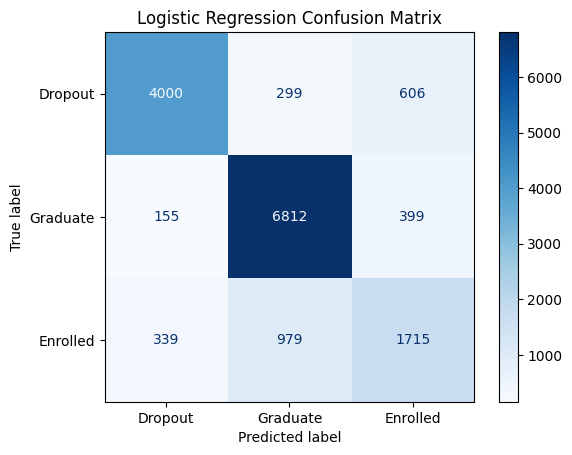

In [ ]:
conf_matrix = confusion_matrix(y_test, log_reg_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dropout', 'Graduate', 'Enrolled'])
print("Confusion Matrix:\n", conf_matrix)
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

###**[4] Adaboost**

In [ ]:
abc = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot_adaboost(X, y, model)
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

models.append("AdaBoost Classifier")
results.append(model.score(X_train, y_train))
joblib.dump(model, 'adaboost_model.pkl')

feature_importances_ada = model.feature_importances_
top_features_indices_ada = feature_importances_ada.argsort()[-3:][::-1]
top_features_ada = [x_train_src.columns[i] for i in top_features_indices_ada]
features["AdaBoost"] = top_features_ada

Accuracy score (training): 0.815
Accuracy score (validation): 0.819


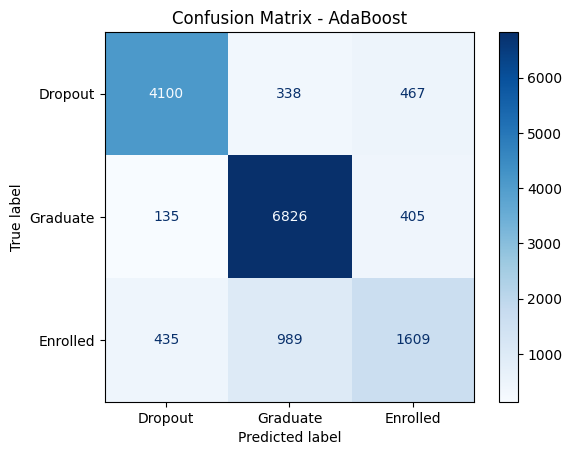

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dropout', 'Graduate', 'Enrolled'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

###**[5] KNN**

In [ ]:
k = 14  # could have used any other k value
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

models.append("KNN")
results.append(accuracy_score(y_test, y_pred))
joblib.dump(knn, 'knn_model.pkl')

mean_distances = np.mean(np.abs(X_train[:, :, None] - X_train[:, None, :]), axis=(0, 1))
knn_top_features_indices = mean_distances.argsort()[-3:][::-1]
top_features_knn = [x_train_src.columns[i] for i in knn_top_features_indices]
features["KNN"] = top_features_knn

Accuracy: 0.80


###**[6] Neural-Network**

In [ ]:
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

class_weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights_array[0], 1: class_weights_array[1], 2: class_weights_array[2]}  # Manually create dictionary

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


model_fitting= model.fit(X_train, y_train_categorical, epochs=500, batch_size=128, validation_split=0.2,class_weight=class_weights, callbacks=[early_stopping])


test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

models.append("Neural Network")
results.append(test_accuracy)
joblib.dump(model, 'neural_network_model.pkl')

class CompatibleKerasModel(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.argmax(self.keras_model.predict(X), axis=1)
compatible_model = CompatibleKerasModel(model)
perm_importance = permutation_importance(compatible_model, X_test, np.argmax(y_test_categorical, axis=1), scoring='accuracy', n_jobs=-1)
nn_top_features_indices = perm_importance.importances_mean.argsort()[-3:][::-1]
top_features_nn = [x_train_src.columns[i] for i in nn_top_features_indices]
features["Neural Network"] = top_features_nn

Epoch 1/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7567 - loss: 0.6546 - val_accuracy: 0.7979 - val_loss: 0.5108
Epoch 2/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.5323 - val_accuracy: 0.7916 - val_loss: 0.5159
Epoch 3/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.5193 - val_accuracy: 0.7907 - val_loss: 0.5189
Epoch 4/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8111 - loss: 0.5133 - val_accuracy: 0.8120 - val_loss: 0.4780
Epoch 5/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8131 - loss: 0.5076 - val_accuracy: 0.7931 - val_loss: 0.5085
Epoch 6/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.5041 - val_accuracy: 0.8035 - val_loss: 0.4926
Epoch 7/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.5017 - val_accuracy: 0.7992 - val_loss: 0.4980
Epoch 8/500
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.5042 - val_accu

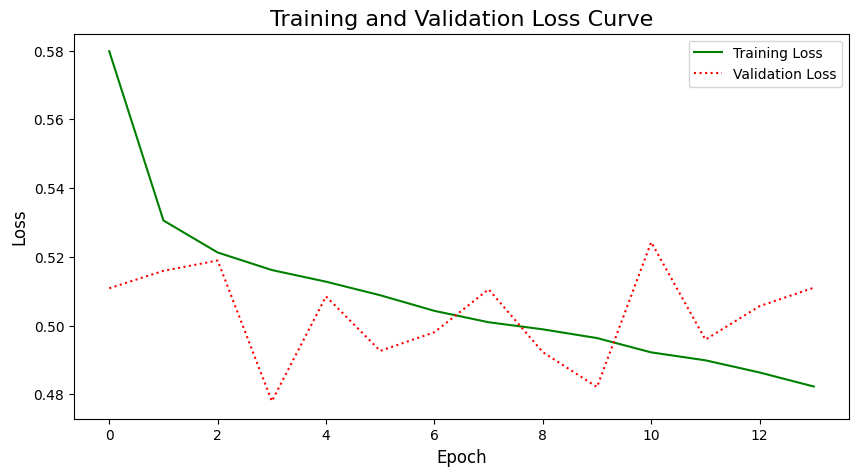

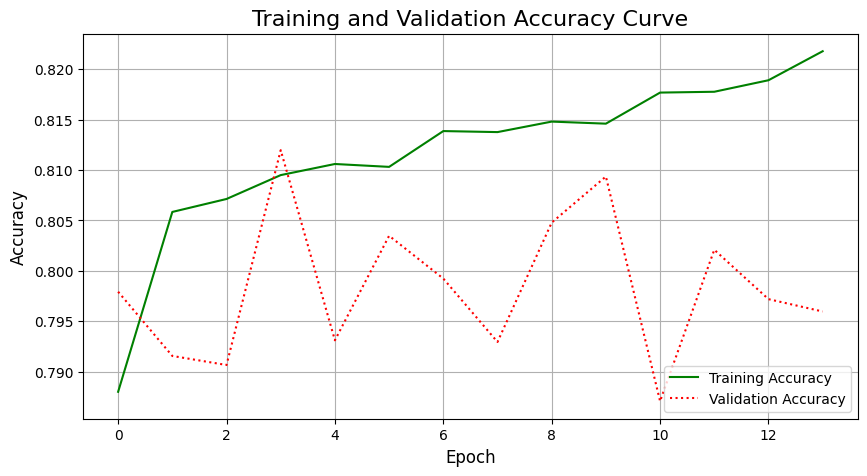

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(model_fitting.history['loss'], label='Training Loss', color='green', linestyle='-')
plt.plot(model_fitting.history['val_loss'], label='Validation Loss', color='red', linestyle=':')
plt.title("Training and Validation Loss Curve", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.show()

printer()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(model_fitting.history['accuracy'], label='Training Accuracy', color='green', linestyle='-')
plt.plot(model_fitting.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle=':')
plt.title("Training and Validation Accuracy Curve", fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


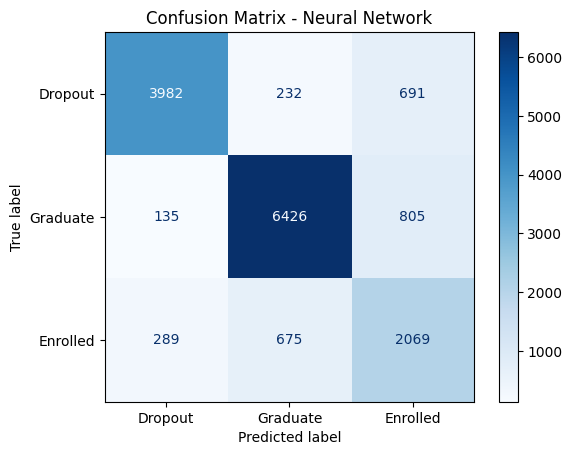

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.90      0.81      0.86      4905
    Graduate       0.88      0.87      0.87      7366
    Enrolled       0.58      0.68      0.63      3033

    accuracy                           0.82     15304
   macro avg       0.79      0.79      0.79     15304
weighted avg       0.83      0.82      0.82     15304



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Dropout', 'Graduate', 'Enrolled'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Neural Network")
plt.show()

# Print the classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Dropout', 'Graduate', 'Enrolled'])
print("==============================")
print("Classification Report:\n", report)

###**[6] Ensembled Model**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')

voting_clf = VotingClassifier(estimators=[('Decision Tree', decision_tree),('Random Forest', random_forest),('AdaBoost', adaboost),('KNN', knn)], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_ensemble = voting_clf.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensembled Model Accuracy: {ensemble_accuracy * 100:.2f}%")
models.append("Ensembled Model")
results.append(ensemble_accuracy)

Ensembled Model Accuracy: 79.21%




---



---



###**Comparative Summary [Based on model accuracy]**



Decision-Tree: 81.18792472556194%

Random Forest: 83.02404600104548%

Logistic Regression: 81.85441714584422%

AdaBoost Classifier: 81.51403273760904%

KNN: 79.5739675901725%

Neural Network: 81.52770400047302%

Ensembled Model: 79.2080501829587%



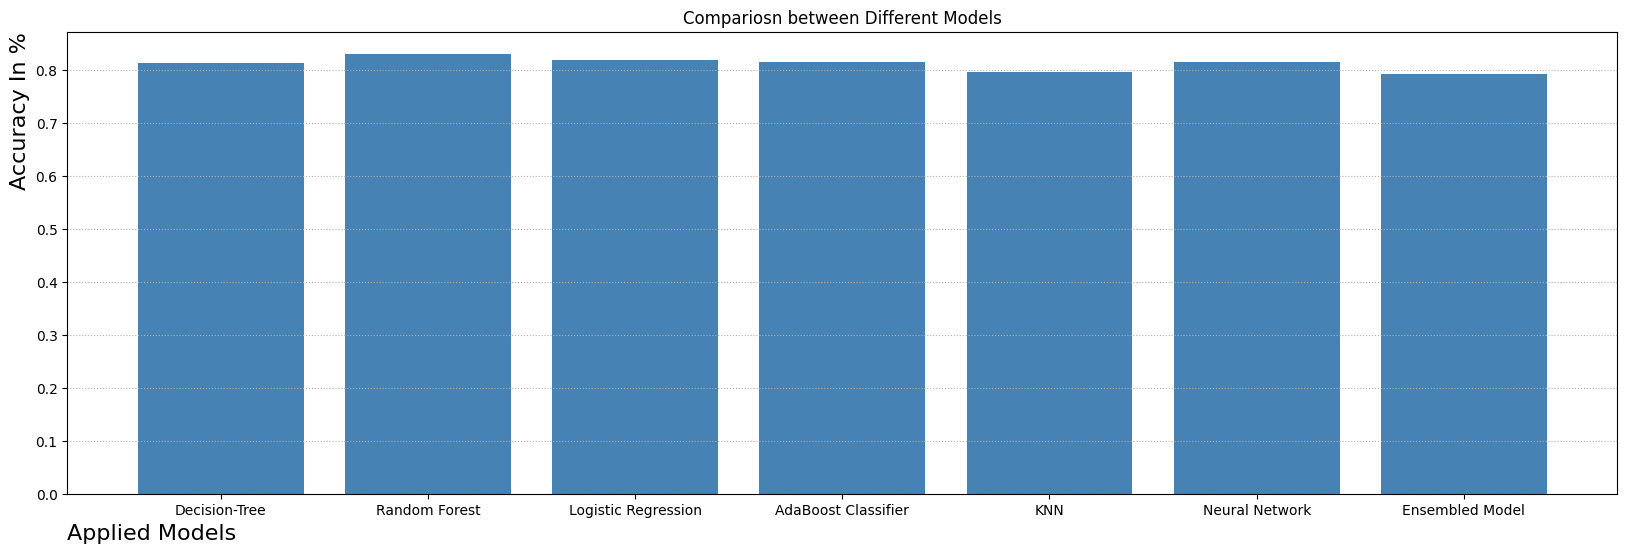

In [ ]:
for i in range(len(models)):
    print(f"{models[i]}: {results[i]*100}%\n")

plt.figure(figsize=(20,6))
plt.bar(models, results, color='steelblue')
plt.xlabel('Applied Models',loc="left",fontsize="16")
plt.ylabel('Accuracy In %',loc="top",fontsize="16")
plt.title('Compariosn between Different Models')
plt.grid(axis='y', linestyle='dotted')
plt.show()

In [ ]:
featurevoting={}
for i,j in features.items():
    for a in j:
        if a in featurevoting:
            featurevoting[a]+=1
        else:
            featurevoting[a]=1
sorted_features = dict(sorted(featurevoting.items(), key=lambda item: item[1], reverse=True))

for a,b in sorted_features.items():
    print(f"[{a}]---> {b} Vote")

[Curricular units 2nd sem (approved)]---> 5 Vote
[Curricular units 2nd sem (grade)]---> 4 Vote
[Curricular units 1st sem (approved)]---> 3 Vote
[Tuition fees up to date]---> 2 Vote
[Curricular units 1st sem (evaluations)]---> 1 Vote
[Displaced]---> 1 Vote
[Gender]---> 1 Vote
[Mother's qualification]---> 1 Vote


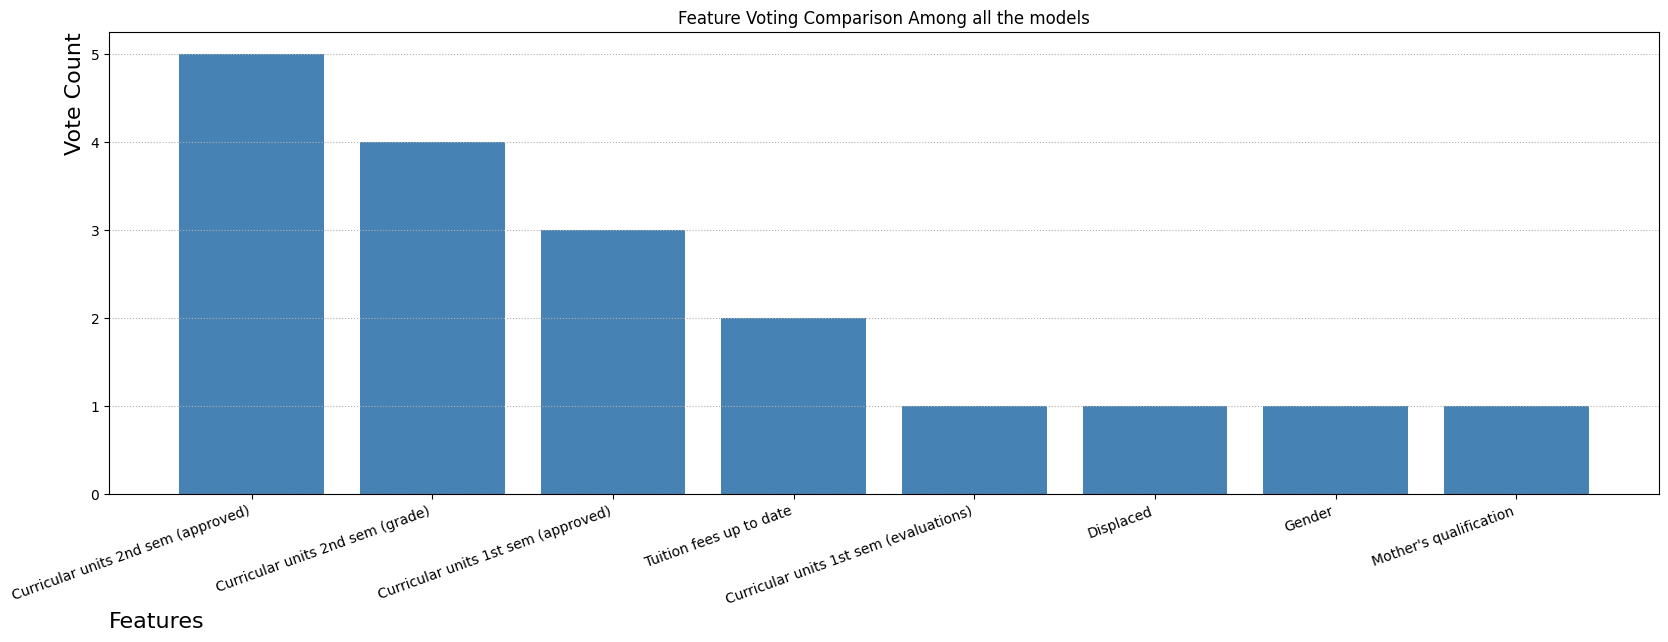

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(sorted_features.keys(), sorted_features.values(), color='steelblue')
plt.xlabel('Features', loc="left", fontsize="16")
plt.ylabel('Vote Count', loc="top", fontsize="16")
plt.title('Feature Voting Comparison Among all the models')
plt.grid(axis='y', linestyle='dotted')
plt.xticks(rotation=20, ha='right')
plt.show()



---



---



###**Unsupervised Learning Outcome using the seperate Test Dataset**

In [ ]:
def preprocess_data(df):
    df = df.drop(['id', 'Application order', 'Educational special needs', 'Nacionality', 'International',"Mother's occupation", "Father's occupation"], axis=1, errors='ignore')

    if 'Target' in df.columns:
        df['Target'] = df['Target'].map({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})
    return df

df_test = preprocess_data(df_test)

# df_test.head()

In [ ]:
decision_tree_model = joblib.load('decision_tree_model.pkl')
random_forest_model = joblib.load('random_forest_model.pkl')
logistic_regression_model = joblib.load('logistic_regression_model.pkl')
adaboost_model = joblib.load('adaboost_model.pkl')
knn_model = joblib.load('knn_model.pkl')
neural_network_model = joblib.load('neural_network_model.pkl')

In [ ]:
def preprocess_test_data(df_test, reference_columns):
    if isinstance(reference_columns, np.ndarray):
        reference_columns = [str(i) for i in range(reference_columns.shape[0])]
    if isinstance(df_test, pd.DataFrame):
        df_test.columns = reference_columns
    elif isinstance(df_test, np.ndarray):
        df_test = pd.DataFrame(df_test, columns=reference_columns)
    df_test = df_test.reindex(columns=reference_columns, fill_value=0)
    return df_test

df_test_processed = preprocess_test_data(df_test, X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1]))

In [ ]:
data=10
X_train_array = X_train.values if hasattr(X_train, 'values') else X_train
df_test_array = df_test_processed.values if hasattr(df_test_processed, 'values') else df_test_processed


predictions = {}

predictions['Decision Tree'] = decision_tree_model.predict(df_test_array)
predictions['Random Forest'] = random_forest_model.predict(df_test_array)
predictions['Logistic Regression'] = logistic_regression_model.predict(df_test_array)
predictions['AdaBoost'] = adaboost_model.predict(df_test_array)
predictions['KNN'] = knn_model.predict(df_test_array)
predictions['Neural Network'] = neural_network_model.predict(df_test_array)

for model, preds in predictions.items():
    print(f"Predictions by {model}:")
    print(preds[:data])

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step
Predictions by Decision Tree:
[2 1 1 1 1 1 1 1 1 1]
Predictions by Random Forest:
[0 1 1 1 1 1 1 1 1 1]
Predictions by Logistic Regression:
[2 2 2 2 2 2 2 2 2 2]
Predictions by AdaBoost:
[0 1 1 1 1 1 1 1 1 1]
Predictions by KNN:
[0 0 0 0 0 0 0 0 0 0]
Predictions by Neural Network:
[[0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]
 [0.99999994 0.         0.        ]]


In [ ]:
# Explanation of Predictions
for model, preds in predictions.items():
    print(f"Model: {model}")
    if model == 'Neural Network':
        print("Predictions represent probabilities for each class (Dropout, Graduate, Enrolled):")
        row = 1
        for prob in preds[:data]:
            print(f"Row {row}: Dropout: {prob[0]:.2f}, Graduate: {prob[1]:.2f}, Enrolled: {prob[2]:.2f}")
            row += 1
    else:
        print("Predictions represent the predicted class labels:")
        class_counts = {0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'}
        row = 1
        for pred in preds[:data]:
            print(f"Row {row}: Predicted Class: {class_counts[pred]}")
            row += 1
    print("\n")

Model: Decision Tree
Predictions represent the predicted class labels:
Row 1: Predicted Class: Enrolled
Row 2: Predicted Class: Graduate
Row 3: Predicted Class: Graduate
Row 4: Predicted Class: Graduate
Row 5: Predicted Class: Graduate
Row 6: Predicted Class: Graduate
Row 7: Predicted Class: Graduate
Row 8: Predicted Class: Graduate
Row 9: Predicted Class: Graduate
Row 10: Predicted Class: Graduate


Model: Random Forest
Predictions represent the predicted class labels:
Row 1: Predicted Class: Dropout
Row 2: Predicted Class: Graduate
Row 3: Predicted Class: Graduate
Row 4: Predicted Class: Graduate
Row 5: Predicted Class: Graduate
Row 6: Predicted Class: Graduate
Row 7: Predicted Class: Graduate
Row 8: Predicted Class: Graduate
Row 9: Predicted Class: Graduate
Row 10: Predicted Class: Graduate


Model: Logistic Regression
Predictions represent the predicted class labels:
Row 1: Predicted Class: Enrolled
Row 2: Predicted Class: Enrolled
Row 3: Predicted Class: Enrolled
Row 4: Predicted 

In [ ]:

prediction_dfs = {}
for model, preds in predictions.items():
    if preds.ndim > 1:
        prediction_dfs[model] = pd.DataFrame(preds, columns=[f"{model} Class {i}" for i in range(preds.shape[1])])
    else:
        prediction_dfs[model] = pd.DataFrame(preds, columns=[f"{model} Predictions"])
output_file = "model_predictions.xlsx"
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for model, df in prediction_dfs.items():
        df.to_excel(writer, sheet_name=model, index=False)
print(f"Predictions have been saved to {output_file}")

Predictions have been saved to model_predictions.xlsx
